<a href="https://colab.research.google.com/github/Keerthana22-elango/Machine_learning/blob/main/Navie_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Model
Accuracy: 0.917910447761194

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       323
           1       0.82      0.75      0.78        79

    accuracy                           0.92       402
   macro avg       0.88      0.85      0.87       402
weighted avg       0.92      0.92      0.92       402



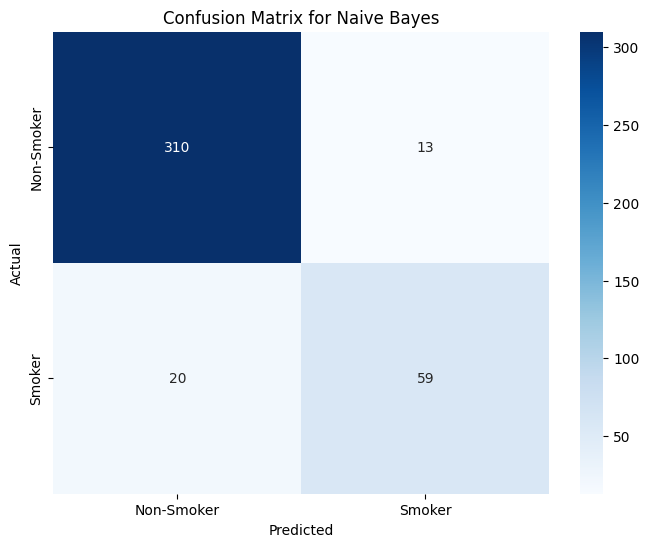

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['sex', 'region']:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

# Encode the target variable (smoker) as binary: 1 if smoker, 0 if non-smoker
insurance_data['smoker'] = insurance_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = insurance_data.drop(columns=['smoker'])
y = insurance_data['smoker']

# Standardize features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions and calculate performance metrics
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display results summary
print("Naive Bayes Model")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
